In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

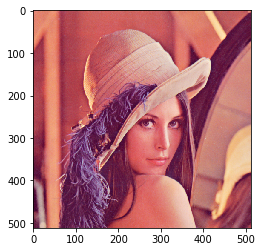

In [2]:
img1 = cv2.imread('lena512color.tiff')
img1 = img1[:,:,::-1] # BGR to RGB

plt.imshow(img1)

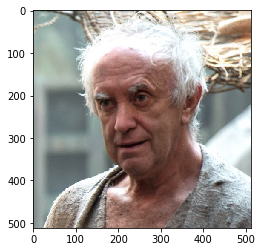

In [3]:
img2 = cv2.imread('highsparrow.jpg')
img2 = img2[:,:,::-1] # BGR to RGB

plt.imshow(img2)

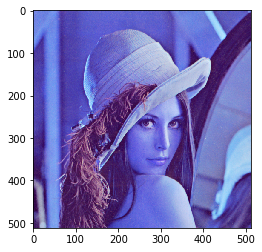

In [4]:
img1_rb_swapped = img1[:, :, [2, 1, 0]].copy()
plt.imshow(img1_rb_swapped)

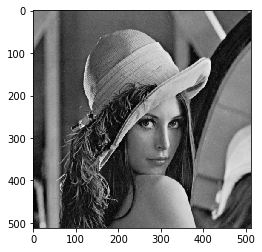

In [77]:
# img1_g = img1.copy()
img1_g = img1[:, :, 1].copy()
# img1_g[:, :, [0, 2]] = 0
# plt.imshow(img1_g)
plt.imshow(img1_g, cmap='gray')

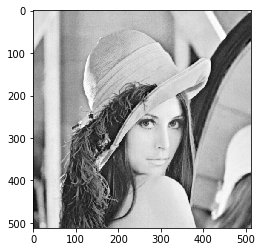

In [78]:
# img1_r = img1.copy()
img1_r = img1[:, :, 0].copy()
# img1_r[:, :, [1, 2]] = 0
# plt.imshow(img1_r)
plt.imshow(img1_r, cmap='gray')

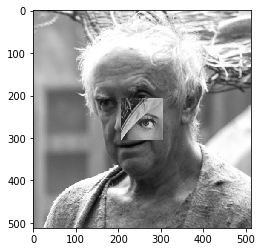

In [7]:
img1_gr = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2_gr = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

subimage_offset = 50
center_yx = img1_gr.shape[0] // 2, img1_gr.shape[1] // 2
img2_gr[center_yx[0] - subimage_offset:center_yx[0] + subimage_offset, center_yx[1] - subimage_offset: center_yx[1] + subimage_offset] = img1_gr[center_yx[0] - subimage_offset: center_yx[0] + subimage_offset, center_yx[1] - subimage_offset: center_yx[1] + subimage_offset]

plt.imshow(img2_gr, cmap='gray')

In [8]:
print("Minimum pixel value of M1g is: {}".format(img1_g.min()))
print("Maximum pixel value of M1g is: {}".format(img1_g.max()))
print("Mean of pixel values of M1g is: {}".format(img1_g.mean()))
print("Standard Deviation of pixel values of M1g is: {}".format(img1_g.std()))

Minimum pixel value of M1g is: 3
Maximum pixel value of M1g is: 248
Mean of pixel values of M1g is: 99.05121612548828
Standard Deviation of pixel values of M1g is: 52.87751732904626


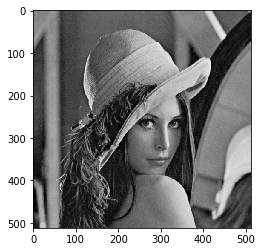

In [79]:
img1_g_mean = img1_g.mean()
img1_g_norm = 10 * (img1_g - img1_g_mean) / img1_g.std()
img1_g_norm += img1_g_mean
img1_g_norm = img1_g_norm.astype(int)
img1_g_norm = img1_g_norm.clip(0, 255)

plt.imshow(img1_g_norm, cmap='gray')

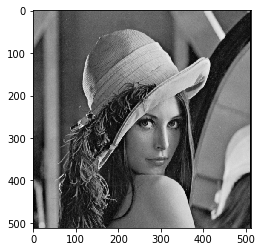

In [80]:
T = np.float32([[1, 0, -2],[0, 1, 0]])
img1_g_shifted = cv2.warpAffine(img1_g, T, img1_g.shape[::-1])
plt.imshow(img1_g_shifted, cmap='gray')

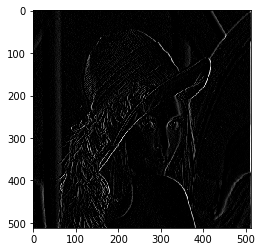

In [81]:
img1_g_diff = cv2.subtract(img1_g, img1_g_shifted)
plt.imshow(img1_g_diff, cmap='gray')

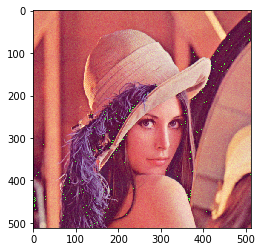

In [84]:
sigma = 10
noise = np.random.normal(0, sigma, img1.shape[:-1])
# plt.imshow(noise, cmap='gray')

img1_noisy_g = img1.copy()
img1_noisy_g[:, :, 1] = np.add(img1_noisy_g[:, :, 1], noise, casting='unsafe')
img1_noisy_g[:, :, 1] = img1_noisy_g[:, :, 1].clip(0, 255)

plt.imshow(img1_noisy_g)

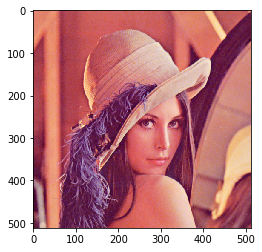

In [85]:
img1_noisy_b = img1.copy()
img1_noisy_b[:, :, 2] = np.add(img1_noisy_b[:, :, 2], noise, casting='unsafe')
img1_noisy_b[:, :, 2] = img1_noisy_b[:, :, 2].clip(0, 255)

plt.imshow(img1_noisy_b)